In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%cd D:\School\540\Data

D:\School\540\Data


### Cleaning/Formatting Flat File Source

In [3]:
# Read in CSV data.
df = pd.read_csv('CDC_data.csv')
df = df.rename(columns=lambda x: x.strip())  # Strip whitespace on column headers.
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
1,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR
3,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,NaN,Value,...,NaN,PA,PA1,Q045,VALUE,59,Income,"Less than $15,000",INC,INCLESS15
4,2015,2015,GU,Guam,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,Value,...,"(13.444304, 144.793731)",PA,PA1,Q044,VALUE,66,Race/Ethnicity,Hispanic,RACE,RACEHIS


In [4]:
len(df)  # View number of records.

76393

In [5]:
df.dtypes  # View column data types.

YearStart                       int64
YearEnd                         int64
LocationAbbr                   object
LocationDesc                   object
Datasource                     object
Class                          object
Topic                          object
Question                       object
Data_Value_Unit               float64
Data_Value_Type                object
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
Sample_Size                   float64
Total                          object
Age(years)                     object
Education                      object
Gender                         object
Income                         object
Race/Ethnicity                 object
GeoLocation                    object
ClassID                        object
TopicID                        object
QuestionID  

In [6]:
df.describe(include='all')  # View summary statistics.

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
count,76393.000000,76393.000000,76393,76393,76393,76393,76393,76393,0.0,76393,...,74965,76393,76393,76393,76393,76393.000000,76384,76384,76384,76384
unique,NaN,NaN,55,55,1,3,3,9,NaN,1,...,105,3,3,9,1,NaN,6,28,6,28
top,NaN,NaN,UT,Arizona,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(41.56266102, -72.649840952)",PA,PA1,Q037,VALUE,NaN,Race/Ethnicity,High school graduate,RACE,RACENAA
freq,NaN,NaN,1428,1428,76393,43293,43293,13525,NaN,76393,...,1092,43293,43293,13525,76393,NaN,21824,2728,21824,2728
mean,2015.271700,2015.271700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,30.805362,NaN,NaN,NaN,NaN
std,2.702072,2.702072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.390874,NaN,NaN,NaN,NaN
min,2011.000000,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,2013.000000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,NaN
50%,2015.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN
75%,2017.000000,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN


In [7]:
# Observe if there are any inconsistent values for Fuzzy Matching.
print(df.Question.value_counts())
print(df.LocationAbbr.value_counts())
print(df.YearStart.value_counts())

Percent of adults aged 18 years and older who have an overweight classification                                                                                                                                                                          13525
Percent of adults aged 18 years and older who have obesity                                                                                                                                                                                               13525
Percent of adults who engage in no leisure-time physical activity                                                                                                                                                                                        13497
Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)                                      

We want to filter by the obesity data and then group by year and state. Also drop Puerto Rico, Guam, and Virgin Islands. It does not appear that Fuzzy Matching is necessary.

In [8]:
df = df[~df.LocationAbbr.isin(['PR','GU','VI'])]  # Drop PR, GU, and VI.

In [9]:
# Columns to keep. GeoLocation kept for potential map visualizations. 
keepCols = ['YearStart', 'LocationAbbr', 'LocationDesc', 'Question', 
            'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit',
            'Sample_Size', 'GeoLocation', 'StratificationCategory1', 'Stratification1']

df = df[keepCols]  # Subset by our list of columns.
df = df[df['Question'] == 'Percent of adults aged 18 years and older who have obesity']  # Subset by obesity data.
del df['Question']  # Column no longer needed.
len(df)  # View updated number of records.

13077

In [10]:
df.isnull().sum()  # View number of null records by column.

YearStart                     0
LocationAbbr                  0
LocationDesc                  0
Data_Value                 1186
Low_Confidence_Limit       1186
High_Confidence_Limit      1186
Sample_Size                1186
GeoLocation                 252
StratificationCategory1       1
Stratification1               1
dtype: int64

In [11]:
df = df.dropna(subset=['Sample_Size'])  # Drop rows without a sample.
print(df.isnull().sum())  # View updated number of null records.
print(len(df))  # View updated total number of records.

YearStart                    0
LocationAbbr                 0
LocationDesc                 0
Data_Value                   0
Low_Confidence_Limit         0
High_Confidence_Limit        0
Sample_Size                  0
GeoLocation                252
StratificationCategory1      0
Stratification1              0
dtype: int64
11891


In [12]:
df[df['GeoLocation'].isnull()]['LocationDesc'].value_counts()  # Look into remaining null values.

National    252
Name: LocationDesc, dtype: int64

The records with null coordinates is national data. This is fine.

In [13]:
df.Stratification1.value_counts()

High school graduate                467
$50,000 - $74,999                   467
Female                              467
$25,000 - $34,999                   467
$35,000 - $49,999                   467
55 - 64                             467
65 or older                         467
Less than high school               467
35 - 44                             467
$15,000 - $24,999                   467
Less than $15,000                   467
45 - 54                             467
25 - 34                             467
Non-Hispanic White                  467
18 - 24                             467
Male                                467
College graduate                    467
Some college or technical school    467
Total                               467
Data not reported                   467
$75,000 or greater                  467
Hispanic                            453
2 or more races                     434
Non-Hispanic Black                  384
American Indian/Alaska Native       325


There appears to be a 'total' value along with what I originally thought was just data by individual demographic breakdowns. I will keep the data at this level of depth. Depending on what is available in the Yelp API, this could allow for further analysis compared to only looking at the state total.

In [14]:
# GeoLocation is in the format (Lat,Long). Strip parentheses then split into Lat and Long columns. 
df['Lat'] = [np.nan if pd.isnull(x) else x.strip('()').split(',')[0] for x in df.GeoLocation]
df['Long'] = [np.nan if pd.isnull(x) else x.strip('()').split(',')[1] for x in df.GeoLocation]
df.head()

,YearStart,LocationAbbr,LocationDesc,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,GeoLocation,StratificationCategory1,Stratification1,Lat,Long
1,2013,US,National,28.8,28.1,29.5,62562.0,NaN,Income,"$50,000 - $74,999",NaN,NaN
6,2012,DC,District of Columbia,31.6,24.0,40.4,243.0,"(38.890371385, -77.031961127)",Education,Less than high school,38.890371385,-77.031961127
8,2011,AL,Alabama,35.2,30.7,40.0,598.0,"(32.840571122, -86.631860762)",Age (years),25 - 34,32.840571122,-86.631860762
11,2011,US,National,35.4,33.0,37.9,6649.0,NaN,Race/Ethnicity,American Indian/Alaska Native,NaN,NaN
16,2011,RI,Rhode Island,32.1,21.6,44.8,109.0,"(41.708280193, -71.522470314)",Race/Ethnicity,Other,41.708280193,-71.522470314


In [15]:
# Rename columns.
df = df.rename({'YearStart': 'Year', 'LocationAbbr': 'State_Code', 'LocationDesc':'State_Name', 
           'StratificationCategory1':'Category','Stratification1':'Demographic'}, axis=1)

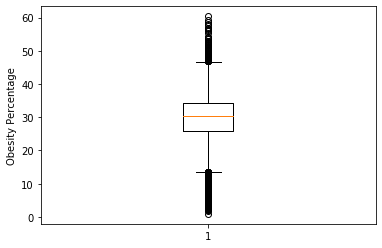

In [16]:
plt.boxplot(df.Data_Value)  # Boxplot of Obesity rates to view outliers.
plt.ylabel("Obesity Percentage");


It appears that there are many outliers here. This is likely from specific demographics by state and year having small sample sizes. Lets observe by the overall state totals.

[array([40.8])]
[array([26.8, 20.2]), array([32.1, 39.7])]


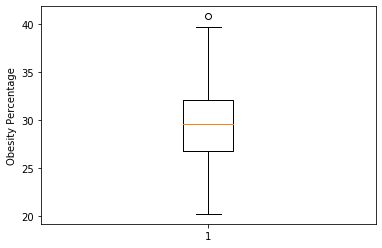

In [17]:
df_tot = df[df['Demographic'] == 'Total']
bp = plt.boxplot(df_tot.Data_Value)  # Boxplot of subsetted data by Demographic = Total.
plt.ylabel("Obesity Percentage");
outliers = [f.get_ydata() for f in bp["fliers"]]  # Get outliers.
print(outliers)
print([w.get_ydata() for w in bp['whiskers']])  # Whisker ranges.


In [18]:
df_tot[df_tot['Data_Value'] > 39.7]  # View the one outlier.

,Year,State_Code,State_Name,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,GeoLocation,Category,Demographic,Lat,Long
74061,2019,MS,Mississippi,40.8,39.0,42.7,4737.0,"(32.745510099000455, -89.53803082499968)",Total,Total,32.745510099000455,-89.53803082499968


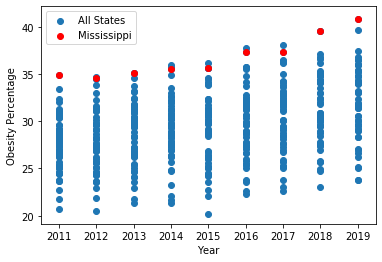

In [19]:
# Observing Mississippi's data.
plt.scatter(df_tot.Year, df_tot.Data_Value, label='All States')
plt.scatter(df_tot[df_tot.State_Code == 'MS'].Year, df_tot[df_tot.State_Code == 'MS'].Data_Value, c='red', label='Mississippi')
plt.ylabel('Obesity Percentage')
plt.xlabel('Year')
plt.legend();

Mississippi 2019 is described as an outlier, however it appears to be consistent with the state's trend. I think this value should be kept.

In [20]:
#df.to_csv('CDC_data_clean.csv', index=False)  # Write cleaned data to csv.